In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [229]:
df = pd.read_excel('prospectscoringhw.xlsx',header=2)

In [230]:
df

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y
0,1,302,57,70,63,0,0,0,1
1,0,221,57,60,37,12,26,14,0
2,0,202,48,25,63,0,13,14,0
3,1,148,57,55,63,0,0,0,0
4,0,43,57,55,63,0,0,0,0
...,...,...,...,...,...,...,...,...,...
499,1,141,57,55,63,0,13,0,0
500,0,232,48,50,26,0,26,14,0
501,0,302,57,70,63,0,0,14,1
502,0,84,42,70,63,0,0,0,0


In [440]:
### Splitting Dataset into Estimation and Holdout Set
estimation = df.loc[:199,:].copy()
holdout = df.loc[204:,:].copy()

In [441]:
estimation

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y
0,1,302,57,70,63,0,0,0,1
1,0,221,57,60,37,12,26,14,0
2,0,202,48,25,63,0,13,14,0
3,1,148,57,55,63,0,0,0,0
4,0,43,57,55,63,0,0,0,0
...,...,...,...,...,...,...,...,...,...
195,1,252,48,70,52,0,13,14,1
196,0,326,24,60,63,12,26,0,0
197,0,79,57,70,63,0,0,0,1
198,1,227,57,55,63,12,0,0,0


In [442]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty= 'none',max_iter=1000)
col = estimation.columns[:-1]
X = estimation[col]
X = np.array(X)
y = estimation['y']
y = y.astype('int')
LR.fit(X,y)

LogisticRegression(max_iter=1000, penalty='none')

In [443]:
LR.coef_
#LR.intercept_

array([[-0.04697744,  0.00596778,  0.04387026,  0.06982546,  0.03418355,
         0.00890337, -0.00090103, -0.00082746]])

In [444]:
#scores = LR.predict(X)
score = LR.predict_proba(X_hold)[:,1]
t = score
t = t.astype(float)
holdout['response'] = t

In [451]:
avgest = LR.predict_proba(X)[:,1].mean()

In [452]:
# holdout['response'] = np.exp(holdout['scores'])/(1 + np.exp(holdout['scores']))
holdout['lift'] = holdout['response']/(avgest)

In [454]:
holdout = holdout.sort_values(by ='lift', ascending= False)
# holdout = holdout.reset_index(drop = True)

In [455]:
holdout

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,response,lift
335,1,317,57,70,63,12,26,0,1,0.750465,2.084618
447,0,321,57,70,63,0,28,0,0,0.743321,2.064773
395,0,315,57,70,63,0,0,14,1,0.739069,2.052964
363,0,311,57,70,63,0,0,0,1,0.736693,2.046363
223,1,314,57,70,63,0,0,0,1,0.731015,2.030590
...,...,...,...,...,...,...,...,...,...,...,...
415,0,406,39,0,63,0,26,0,0,0.016221,0.045059
356,0,291,39,10,52,0,0,28,0,0.011330,0.031473
300,0,159,57,15,41,0,26,0,0,0.011051,0.030697
489,1,354,30,10,52,0,0,0,0,0.010862,0.030172


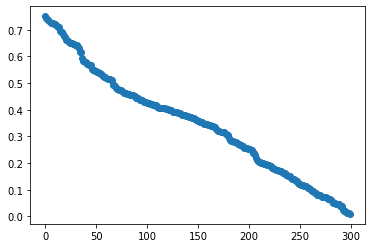

In [456]:
x = [k for k in range(300)]
y = holdout['response']
plt.scatter(x,y)

Pn > 12/30 
Pn > 0.4 
This corresponds to the first 121. 

In [460]:
len(holdout[holdout['response'] >= 0.4])

121

In [462]:
holdout['cumresp']= np.cumsum(holdout['response'])

In [463]:
holdout

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,response,lift,cumresp
335,1,317,57,70,63,12,26,0,1,0.750465,2.084618,0.750465
447,0,321,57,70,63,0,28,0,0,0.743321,2.064773,1.493785
395,0,315,57,70,63,0,0,14,1,0.739069,2.052964,2.232855
363,0,311,57,70,63,0,0,0,1,0.736693,2.046363,2.969548
223,1,314,57,70,63,0,0,0,1,0.731015,2.030590,3.700562
...,...,...,...,...,...,...,...,...,...,...,...,...
415,0,406,39,0,63,0,26,0,0,0.016221,0.045059,104.187426
356,0,291,39,10,52,0,0,28,0,0.011330,0.031473,104.198756
300,0,159,57,15,41,0,26,0,0,0.011051,0.030697,104.209808
489,1,354,30,10,52,0,0,0,0,0.010862,0.030172,104.220670


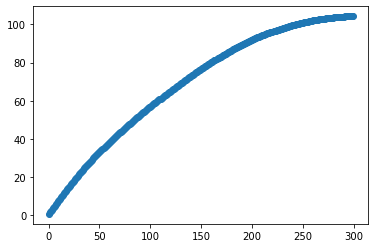

In [464]:
x = [k for k in range(300)]
y = holdout['cumresp']
plt.scatter(x,y,marker= 'o')

In [480]:
len(holdout[holdout['cumresp'] <=40])

64

Contact 64 to sell only 40 boxes. 

In [481]:
holdout['cumy'] = np.cumsum(holdout['y'])

In [484]:
holdout['cumy'].head(20)

335     1
447     1
395     2
363     3
223     4
494     4
207     5
501     6
404     7
246     8
449     9
345    10
334    10
441    10
254    10
458    10
403    11
323    11
261    11
316    11
Name: cumy, dtype: object

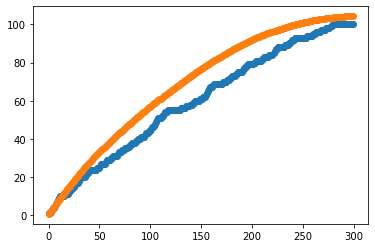

In [345]:
x = [i for i in range (300)]
y2 = holdout['cumresp']
y = holdout['cumy']
plt.scatter(x,y)
plt.scatter(x,y2)

Descrepancy: Both charts start and end with approx. the same slope but we have a descrepancy somewhere between 50-270 prospects. This is due to the low accuracy of prediction which is ultimately caused by a smaller estimation set compared to the holdout set. 
To sell 40 boxes, according to the actual responses, we need to contact approximately 100 prospects. 

In [526]:
key = pd.read_csv('Keyword Stats 2021-05-18 at 21_03_45.csv', header = 2)
key = key[key.columns[:7]]
key

,Keyword,Currency,Avg. monthly searches,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range)
0,mba requirements,USD,5000.0,High,75.0,7.71,28.78
1,emba requirements,USD,50.0,Medium,59.0,6.56,28.62
2,executive mba requirements,USD,50.0,High,84.0,7.79,30.91
3,part time mba requirements,USD,50.0,High,76.0,8.53,37.55
4,part time mba experience,USD,NaN,Unknown,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1234,imperial mba gmat average,USD,50.0,Unknown,NaN,NaN,NaN
1235,kelley school of business acceptance,USD,50.0,Low,0.0,NaN,NaN
1236,minimum gpa for mba programs,USD,50.0,Medium,51.0,11.54,34.01
1237,northwestern mba gpa requirements,USD,50.0,Low,11.0,NaN,NaN


In [527]:
key = key[key.columns[:7]]
key.columns = ['keyword','currency','avg. search','competition','comp ind.','low range bid','high range bid']

In [528]:
key

,keyword,currency,avg. search,competition,comp ind.,low range bid,high range bid
0,mba requirements,USD,5000.0,High,75.0,7.71,28.78
1,emba requirements,USD,50.0,Medium,59.0,6.56,28.62
2,executive mba requirements,USD,50.0,High,84.0,7.79,30.91
3,part time mba requirements,USD,50.0,High,76.0,8.53,37.55
4,part time mba experience,USD,NaN,Unknown,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1234,imperial mba gmat average,USD,50.0,Unknown,NaN,NaN,NaN
1235,kelley school of business acceptance,USD,50.0,Low,0.0,NaN,NaN
1236,minimum gpa for mba programs,USD,50.0,Medium,51.0,11.54,34.01
1237,northwestern mba gpa requirements,USD,50.0,Low,11.0,NaN,NaN


In [542]:
key = key.dropna()
key.sort_values(by= 'comp ind.', ascending= False)
key['avg. bid'] = (key['low range bid'] + key['high range bid'])/2
key.sort_values(by= 'avg. bid', ascending= False)
### Searching for keywords that do not contain UCLA. 
###This is because if the user types in UCLA it is very likely they will cklick on a result including UCLA. Hence Ad is not needed. 
key1 = key[key['keyword'].str.contains('executive mba')==True]
#key1 = key
key1 = key1.reset_index(drop = True)

In [546]:
key1.sort_values(by = ['avg. search','avg. bid','competition'], ascending = [False,True,False]).head(20)

,keyword,currency,avg. search,competition,comp ind.,low range bid,high range bid,avg. bid
2,online executive mba no gmat,USD,500.0,High,88.0,23.26,55.78,39.520
8,gmat score for executive mba,USD,50.0,High,77.0,5.74,12.84,9.290
19,nyu stern executive mba acceptance rate,USD,50.0,Medium,51.0,6.00,13.00,9.500
20,oxford executive mba acceptance rate,USD,50.0,Medium,53.0,6.77,12.50,9.635
26,executive mba application,USD,50.0,High,77.0,6.13,16.24,11.185
14,wharton executive mba requirements,USD,50.0,Medium,47.0,6.81,16.80,11.805
7,executive mba work experience requirements,USD,50.0,Medium,50.0,5.85,18.69,12.270
24,booth executive mba acceptance rate,USD,50.0,Medium,39.0,5.38,21.65,13.515
13,executive mba qualifications,USD,50.0,High,79.0,5.72,22.20,13.960
9,kellogg executive mba acceptance rate,USD,50.0,Medium,40.0,5.96,22.28,14.120


In [544]:
key1[key1['keyword'] == 'executive mba qualifications']

,keyword,currency,avg. search,competition,comp ind.,low range bid,high range bid,avg. bid
13,executive mba qualifications,USD,50.0,High,79.0,5.72,22.2,13.96


In [425]:
key1[key1['avg. bid']<=25.8]

,keyword,currency,avg. search,competition,comp ind.,low range bid,high range bid,avg. bid
0,executive mba,USD,500.0,High,91.0,8.33,37.14,22.735
3,best executive mba programs,USD,50.0,High,93.0,8.91,41.55,25.230
5,top executive mba programs,USD,50.0,High,90.0,8.40,38.74,23.570
7,best executive mba,USD,50.0,High,82.0,9.19,41.55,25.370
8,weekend mba,USD,50.0,High,100.0,6.96,15.73,11.345
9,professional mba,USD,50.0,High,87.0,10.00,35.00,22.500
11,mba emba,USD,50.0,High,70.0,5.49,27.75,16.620
14,executive mba cost,USD,50.0,High,95.0,5.52,15.00,10.260
16,top executive mba,USD,50.0,High,67.0,8.85,42.68,25.765
19,usc executive mba,USD,500.0,Medium,63.0,7.74,30.00,18.870


In [416]:
dist = []
for i in range(len(key1)):    
    dist.append(np.random.normal(key1.iloc[i,-1],scale = (key1.iloc[:,-1]- key1.iloc[:,-3])/4))
    

In [414]:
key1.iloc[0,-1]

22.735

In [423]:
dist1 = []
for i in dist: 
    dist1.append(np.sort(i))

AxisError: axis -1 is out of bounds for array of dimension 0

In [422]:
dist

array([11.92567272, 14.3445809 , 14.7102514 , 16.44648753, 16.58232069,
       16.70984279, 16.71357942, 16.91788679, 17.00098913, 18.40389858,
       18.5401143 , 18.84960369, 19.569572  , 19.93063866, 19.99027234,
       19.99973765, 20.58025909, 20.77854888, 20.97066137, 21.09455256,
       21.40117954, 21.44881789, 21.59248885, 21.61313443, 21.81344518,
       21.9418255 , 21.98126119, 21.99827214, 22.00715432, 22.82307952,
       23.0184679 , 23.217256  , 23.45237351, 23.66924129, 23.76466068,
       23.81409301, 25.31988638, 25.39343556, 26.53353847, 26.67866534])